# Instagram Posts Analysis

## Data Preparation

In this section, we will perform data cleaning and transform the columns into formats that are more conducive to analysis. This process involves standardizing the data, handling missing values, and converting data types to ensure consistent and accurate analysis.

In [1]:
import warnings

# Ignore all warnings (not recommended in general)
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

comments_data = pd.read_csv('all_comments.csv')
comments_data

,comments,time per comment,user per comment,likes per comment,source
0,"Hi, I am trying to make the annual subscriptio...",3w,sammie_njau,0,datacamp
1,Great work ❤️❤️❤️❤️❤️,7w,credslife_,1 like,datacamp
2,❤️❤️❤️,7w,sadie.stlawrence,1 like,datacamp
3,Awesome 👏🏻,5w,mahmoud_arafa90,0,datacamp
4,Great to be on the show,6w,margahoek,0,datacamp
...,...,...,...,...,...
1812,What a great little craft idea!,8w,judgingamy,1 like,skillshare
1813,@sibster always shares the best ideas 😍,8w,safiinmotherland,1 like,skillshare
1814,This is the cutest idea! Love this!! ❤️,8w,theclassymamabear,0,skillshare
1815,Love this!! ❤️❤️❤️❤️,8w,dansand0val,0,skillshare


In [3]:
# Define a list of keywords to check for in 'likes per comment' column
keywords = ['like', 'likes', '0']

# Use boolean indexing to drop rows that don't contain the keywords
comments_data = comments_data[comments_data['likes per comment'].str.contains('|'.join(keywords))]
comments_data['likes per comment'].value_counts()

likes per comment
1 like      771
0           722
2 likes     215
3 likes      61
4 likes      21
5 likes       6
9 likes       3
6 likes       3
7 likes       3
8 likes       3
91 likes      1
80 likes      1
16 likes      1
Name: count, dtype: int64

In [4]:
comments_data.reset_index(inplace=True, drop=True)
for i in range(len(comments_data)):
    x = comments_data['likes per comment'][i]
    comments_data['likes per comment'][i] = int(x[:2])

In [5]:
from datetime import datetime, timedelta

# Function to convert time duration to date
def convert_time_to_date(time_str):
    # Extract the numeric part and unit (w = weeks, d = days, h = hours, m = minutes)
    time_value = int(time_str[:-1])
    time_unit = time_str[-1]

    # Define a mapping of time units to timedelta functions
    unit_to_timedelta = {
        'w': timedelta(weeks=time_value),
        'd': timedelta(days=time_value),
        'h': timedelta(hours=time_value),
        'm': timedelta(minutes=time_value)
    }

    # Calculate the timedelta
    delta = unit_to_timedelta.get(time_unit, timedelta(0))

    # Calculate the date by subtracting the timedelta from today's date
    comment_date = datetime.now() - delta

    return comment_date.strftime('%Y-%m-%d')

# Apply the function to the 'time per comment' column
comments_data['comment date'] = comments_data['time per comment'].apply(convert_time_to_date)

In [6]:
comments_data

,comments,time per comment,user per comment,likes per comment,source,comment date
0,"Hi, I am trying to make the annual subscriptio...",3w,sammie_njau,0,datacamp,2024-01-01
1,Great work ❤️❤️❤️❤️❤️,7w,credslife_,1,datacamp,2023-12-04
2,❤️❤️❤️,7w,sadie.stlawrence,1,datacamp,2023-12-04
3,Awesome 👏🏻,5w,mahmoud_arafa90,0,datacamp,2023-12-18
4,Great to be on the show,6w,margahoek,0,datacamp,2023-12-11
...,...,...,...,...,...,...
1806,What a great little craft idea!,8w,judgingamy,1,skillshare,2023-11-27
1807,@sibster always shares the best ideas 😍,8w,safiinmotherland,1,skillshare,2023-11-27
1808,This is the cutest idea! Love this!! ❤️,8w,theclassymamabear,0,skillshare,2023-11-27
1809,Love this!! ❤️❤️❤️❤️,8w,dansand0val,0,skillshare,2023-11-27


In [7]:
comments_data['likes per comment'].value_counts()

likes per comment
1     771
0     722
2     215
3      61
4      21
5       6
9       3
6       3
7       3
8       3
91      1
80      1
16      1
Name: count, dtype: int64

In [8]:
comments_data.to_csv("all_comments_cleaned.csv", index=False)

## Visualize Comments

To better visualize the comments into wordcloud, we need first to apply some text cleaning techniques, like transform to lower, remove stop words, tokenization and lemmatization.

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK datasets (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aayoub\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aayoub\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aayoub\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

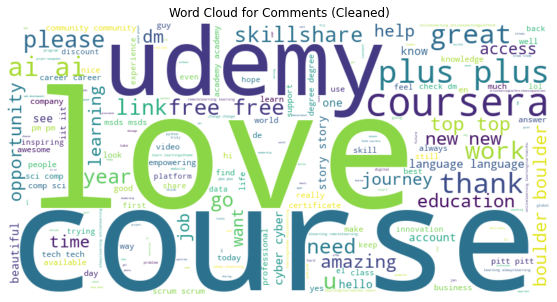

In [10]:
# Combine all comments into a single string
all_comments = ' '.join(comments_data['comments'])

# Convert to lowercase
all_comments_lower = all_comments.lower()

# Tokenize the text (split it into words)
words = word_tokenize(all_comments_lower)

# Remove punctuation and special characters
filtered_words = [word for word in words if word.isalnum()]

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in filtered_words if word not in stop_words]

# Lemmatize words
lemmatizer = WordNetLemmatizer()
filtered_words = [lemmatizer.lemmatize(word) for word in filtered_words]

# Combine the filtered words back into a single string
filtered_comments = ' '.join(filtered_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_comments)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Comments (Cleaned)')
plt.show()

## Sentiment Analysis

In this segment, we will analyze sentiments expressed in comments by categorizing them as positive, negative, or neutral. To enhance the accuracy of sentiment extraction, we will first convert any emojis present in the comments into their corresponding text descriptions. This step aims to capture the underlying emotions and attitudes conveyed through emojis, thus providing a more comprehensive understanding of the overall sentiment in the comments.

In [11]:
import emoji 

# Function to replace emojis with their meanings
def replace_emojis_with_meanings(comment):
    return emoji.demojize(comment, delimiters=("", " "))

# Apply the function to each comment in the 'comments' column
comments_data['comments_with_meanings'] = comments_data['comments'].apply(replace_emojis_with_meanings)

In [12]:
from textblob import TextBlob

# Function to perform sentiment analysis using TextBlob
def analyze_sentiment(comment):
    analysis = TextBlob(comment)
    # Determine sentiment polarity (ranges from -1 to 1)
    sentiment_score = analysis.sentiment.polarity
    return sentiment_score

# Apply sentiment analysis to each comment and add scores to a new column
comments_data['sentiment_score'] = comments_data['comments_with_meanings'].apply(analyze_sentiment)

In [13]:
comments_data

,comments,time per comment,user per comment,likes per comment,source,comment date,comments_with_meanings,sentiment_score
0,"Hi, I am trying to make the annual subscriptio...",3w,sammie_njau,0,datacamp,2024-01-01,"Hi, I am trying to make the annual subscriptio...",-0.250000
1,Great work ❤️❤️❤️❤️❤️,7w,credslife_,1,datacamp,2023-12-04,Great work red_heart red_heart red_heart red_h...,0.800000
2,❤️❤️❤️,7w,sadie.stlawrence,1,datacamp,2023-12-04,red_heart red_heart red_heart,0.000000
3,Awesome 👏🏻,5w,mahmoud_arafa90,0,datacamp,2023-12-18,Awesome clapping_hands_light_skin_tone,1.000000
4,Great to be on the show,6w,margahoek,0,datacamp,2023-12-11,Great to be on the show,0.800000
...,...,...,...,...,...,...,...,...
1806,What a great little craft idea!,8w,judgingamy,1,skillshare,2023-11-27,What a great little craft idea!,0.282813
1807,@sibster always shares the best ideas 😍,8w,safiinmotherland,1,skillshare,2023-11-27,@sibster always shares the best ideas smiling_...,1.000000
1808,This is the cutest idea! Love this!! ❤️,8w,theclassymamabear,0,skillshare,2023-11-27,This is the cutest idea! Love this!! red_heart,0.781250
1809,Love this!! ❤️❤️❤️❤️,8w,dansand0val,0,skillshare,2023-11-27,Love this!! red_heart red_heart red_heart red_...,0.781250


In [14]:
# Group by 'source' and calculate the average sentiment
average_sentiment_by_source = comments_data.groupby('source')['sentiment_score'].mean().reset_index()

average_sentiment_by_source

,source,sentiment_score
0,coursera,0.086483
1,datacamp,0.315695
2,skillshare,0.252980
3,udemy,0.096237


## Engagement Rate

# Engagement Rate Analysis Across Social Media Platforms

To assess the most engaging posts and platforms, we use the engagement rate metric. This provides insights into what content is most interesting to audiences and how interactive the posts are. The engagement rate is calculated using the following formula:

$$
\text{Engagement Rate} = \frac{\text{Post Likes} + \text{Number of Comments}}{\text{Number of Followers}}
$$

## Data Preparation Steps

Before calculating the engagement rate, we need to prepare our data. The preparation involves several steps:

1. **Concatenation of Data from Various Sources**: We start by combining data from different social media platforms into a single dataset. This includes information like post likes and comments.

2. **Merging with User Metrics**: Next, we merge this data with another dataset that includes user metrics such as the number of followers and the number of accounts followed by each user on all platforms.

3. **Calculation of Engagement Rate**: With the data prepared, we apply the above formula to calculate the engagement rate for each post across different social media platforms.

This process allows us to analyze and compare how engaging different posts are across various platforms, highlighting which content resonates most with audiences.

In [15]:
companies_df = pd.read_csv('companies_info.csv')

companies_df = companies_df.rename(columns={'name': 'source'})

companies_df

,source,num of posts,num of followers,num of following
0,udemy,716,3M,134
1,coursera,"1,144",573K,215
2,datacamp,"1,207",199K,70
3,linkedinlearning,522,128K,65
4,skillshare,"3,274",615K,912
5,udacity,528,85.3K,913
6,edxonline,542,150K,110


In [16]:
# Dictionary to map suffixes to numerical values
suffix_mapping = {'M': 1e6, 'K': 1e3}

# Function to replace suffixes with numerical values
def replace_suffix(value):
    for suffix, multiplier in suffix_mapping.items():
        if suffix in value:
            return float(value.replace(suffix, '')) * multiplier
    return float(value)  # If no suffix, return as is

# Apply the function to the column with suffixes
companies_df['num of followers'] = companies_df['num of followers'].apply(replace_suffix)

companies_df

,source,num of posts,num of followers,num of following
0,udemy,716,3000000.0,134
1,coursera,"1,144",573000.0,215
2,datacamp,"1,207",199000.0,70
3,linkedinlearning,522,128000.0,65
4,skillshare,"3,274",615000.0,912
5,udacity,528,85300.0,913
6,edxonline,542,150000.0,110


In [17]:
datacamp_df = pd.read_csv('datacamp.csv')
udemy_df = pd.read_csv('udemy.csv')
coursera_df = pd.read_csv('coursera.csv')
skillshare_df = pd.read_csv('skillshare.csv')

datacamp_df['source'] = 'datacamp'
udemy_df['source']  = 'udemy'
coursera_df['source']  = 'coursera'
skillshare_df['source']  = 'skillshare'

final_df = pd.concat([datacamp_df, udemy_df, coursera_df, skillshare_df], axis=0)
final_df.reset_index(inplace=True, drop=True)

In [18]:
merged_df = final_df.merge(companies_df[['source', 'num of followers']], on='source', how='left')

In [19]:
merged_df.to_csv('merged_data.csv', index=False)

In [20]:
# Specify the column where you want to drop rows with non-numeric values
column_name = 'post likes'

# Convert the specified column to numeric (errors='coerce' converts non-numeric values to NaN)
merged_df[column_name] = pd.to_numeric(merged_df[column_name], errors='coerce')

# Drop rows where the specified column contains NaN (non-numeric values)
merged_df = merged_df.dropna(subset=[column_name])

In [21]:
merged_df['engagement rate'] = (merged_df['post likes'] + merged_df['num of comments'])/merged_df['num of followers']

In [22]:
merged_df

,post likes,post date,post caption,comments,time per comment,user per comment,likes per comment,num of comments,source,num of followers,engagement rate
0,228.0,"Dec 19, 2023",Transform your data science skills with our co...,"['Hi, I am trying to make the annual subscript...",['3w'],['sammie_njau'],['0'],1,datacamp,199000.0,0.001151
1,158.0,"Nov 14, 2023",Master machine learning and AI in Python with ...,[],[],[],[],0,datacamp,199000.0,0.000794
2,96.0,"Nov 21, 2023","🎓 90,000 scholarships now donated\n🌍 across 15...","['Great work ❤️❤️❤️❤️❤️', '❤️❤️❤️']","['7w', '7w']","['credslife_', 'sadie.stlawrence']","['1 like', '1 like']",2,datacamp,199000.0,0.000492
3,31.0,"Nov 13, 2023",What can “The Geek Way” teach us when forming ...,[],[],[],[],0,datacamp,199000.0,0.000156
4,89.0,"Dec 7, 2023",Learn #AI (for free) from leaders at world-cla...,[],[],[],[],0,datacamp,199000.0,0.000447
...,...,...,...,...,...,...,...,...,...,...,...
358,60.0,"Nov 20, 2023",Turn your kitchen into a flavor haven this hol...,[],[],[],[],0,skillshare,615000.0,0.000098
359,414.0,"Dec 25, 2023",'tis the season for moments of happiness ⛸ Hap...,"['Happy holidays!', 'Adorable', ""@skillshare I...","['2w', '2w', '2w', '2w', '3w']","['heatherslettering', 'thehopefulartist_', 'ga...","['0', '0', '0', '0', '0']",5,skillshare,615000.0,0.000681
360,161.0,"Nov 13, 2023","You asked, we listened 👀 Our monthly membershi...",['Wow. Why did I just get charged for a year m...,"['3w', '8w', '8w', '9w', '9w', '9w', '9w']","['manno_chromatic', 'elek.viktoria', 'hadoukie...","['0', '0', '0', '0', '1 like', '0', '2 likes']",7,skillshare,615000.0,0.000273
361,41.0,"Nov 15, 2023",Create your own track in FL Studio with help f...,[],[],[],[],0,skillshare,615000.0,0.000067


## EDA

After computing the engagement rate, it's essential to examine its distribution within our dataset. To achieve this, we will create two types of visualizations: a histogram and a boxplot.

1. **Histogram**: This plot will offer a clear view of the frequency distribution of the engagement rate. By observing the shape of the histogram, we can understand the skewness of the data, whether it's normally distributed, or if it exhibits any other specific distribution pattern. 

2. **Boxplot**: The boxplot provides a concise yet informative representation of the engagement rate's distribution. It highlights the median, quartiles, and any potential outliers in the data. By analyzing the boxplot, we can identify the range of most engagement rates, along with spotting any significant anomalies or outliers that deviate from the general trend.

Together, these visualizations will give us a comprehensive understanding of the `engagement rate` variable. We'll be able to decipher the overall distribution, assess the central tendency and variability, and pinpoint any outliers that might warrant further investigation or consideration in our analysis.

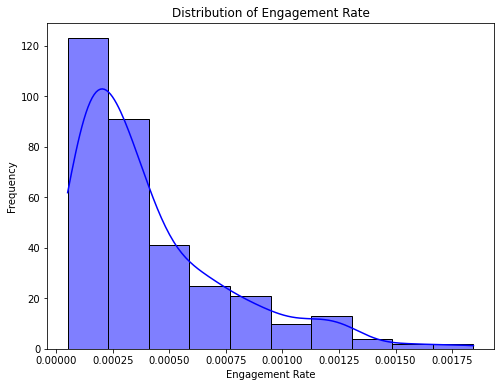

In [23]:
import seaborn as sns

# Create a histogram using Seaborn
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
sns.histplot(merged_df['engagement rate'], bins=10, kde=True, color='blue')
plt.title('Distribution of Engagement Rate')
plt.xlabel('Engagement Rate')
plt.ylabel('Frequency')
plt.show()

The `enagement rate` in our dataset is skewed to the right, which means that the majority of the posts have a low engagement rate

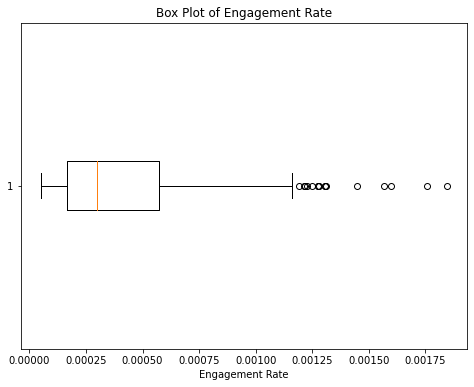

In [24]:
# Create a box plot
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.boxplot(merged_df['engagement rate'], vert=False)  # vert=False for horizontal box plot
plt.title('Box Plot of Engagement Rate')
plt.xlabel('Engagement Rate')
plt.show()

The boxplot reveals the presence of outliers, notably positioned to the right side of the plot. This observation indicates that these outliers have significantly higher `engagement rates` compared to the majority of our dataset. The fact that these outliers are skewed towards the higher end of the engagement spectrum makes them particularly interesting for further analysis.

The existence of such high engagement rates may indicate exceptionally successful content or strategies that are resonating with audiences. Therefore, a closer examination of these outliers could provide valuable insights into what factors contribute to exceptionally high engagement. This could include analyzing the content of these posts, the timing of their publication, the demographics of the engaging audience, or other unique characteristics that set them apart.

In summary, these outliers are not just anomalies; they are potential key learnings that could inform and improve content strategies across platforms. Analyzing them in detail could uncover pivotal factors that drive high audience engagement.

## Influential Points Analysis

In this analysis, we focus on the influential points, or outliers. Our approach involves three main steps:

1. **Identification of Outliers Using IQR Method**: We'll begin by segregating these outliers from the rest of the dataset. The Interquartile Range (IQR) method is a robust technique for identifying outliers, effectively distinguishing those data points that significantly deviate from the typical range of values.

2. **Word Cloud Analysis of Comments**: Next, we explore the most frequent words in comments associated with each outlier post. By generating word clouds, we can visually identify and analyze the most prominent terms and themes in the comments, providing insights into what drives engagement in these posts.

3. **Topic Modeling with LDA**: Lastly, we apply Latent Dirichlet Allocation (LDA) to uncover the underlying topics within the comments of these outlier posts. LDA will help us to identify and categorize the main themes and subjects discussed, offering a deeper understanding of the content that resonates with the audience.

### 1- Detect Outliers

In [25]:
Q1 = merged_df['engagement rate'].quantile(0.25)
Q3 = merged_df['engagement rate'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = merged_df[(merged_df['engagement rate'] < lower_bound) | (merged_df['engagement rate'] > upper_bound)]

print("Outliers:")
outliers

Outliers:


,post likes,post date,post caption,comments,time per comment,user per comment,likes per comment,num of comments,source,num of followers,engagement rate
10,258.0,"Dec 11, 2023",The top 10 data science tools you can use in 2...,['I throw in Langchain and Llamaindex and Neo4...,"['4w', '4w']","['jomorante', 'javiercryptonary_010']","['0', '0']",2,datacamp,199000.0,0.001307
21,253.0,"Nov 23, 2023",60+ #ChatGPT prompts to enhance your data scie...,['Amazing! 👏👏👏'],['7w'],['credslife_'],['1 like'],1,datacamp,199000.0,0.001276
36,366.0,"Nov 17, 2023",SQL is a crucial skill for any data practition...,['Yes!🔥'],['8w'],['alanarodriguezv'],['0'],1,datacamp,199000.0,0.001844
61,286.0,"Dec 14, 2023",💼 New Career Track: Step into the cutting-edge...,"['How much does this entire course cost?', 'Is...","['4w', '4w']","['datalytics.tech', 'shrey_wolfie94']","['0', '1 like']",2,datacamp,199000.0,0.001447
68,252.0,"Dec 20, 2023",DataCamp's top five courses to help you master...,"['Dam guys I asked for them 9 months ago 😂😢', ...","['3w', '3w']","['sitraka17', 'simran__arora_ray_']","['1 like', '2 likes']",2,datacamp,199000.0,0.001276
85,257.0,"Nov 20, 2023",Explore the best AI frameworks and libraries f...,"['Love! ❤️❤️❤️❤️', 'Caret/Pycaret? Huggingface...","['7w', '7w', '7w']","['credslife_', 'dominicarruda', 'scd_company']","['0', '0', '0']",3,datacamp,199000.0,0.001307
194,689.0,"Dec 1, 2023",Ready to learn a lot in a little? Finish the y...,"['FREE', 'FREE', 'Empowering and enriching, th...","['6w', '6w', '6w', '6w', '6w', '6w', '6w', '6w...","['__purple_vibes_.07', 'moukhles_k', 'seyedsha...","['2 likes', '2 likes', '1 like', '2 likes', '1...",15,coursera,573000.0,0.001229
225,681.0,"Jan 5, 2024","Whatever your 2024 goals, we’re here to help y...",['Free'],['1w'],['mecasvi'],['1 like'],1,coursera,573000.0,0.001190
231,736.0,"Oct 25, 2023",New course drop! 🚨 Discover the latest learnin...,['Amidst the vast expanse of the educational c...,"['11w', '11w', '11w', '11w', '11w', '11w', '11...","['seyedshahabmehdinia', 'alir._.z07sh', 'abhis...","['2 likes', '1 like', '1 like', '1 like', '1 l...",15,coursera,573000.0,0.001311
238,682.0,"Nov 25, 2023",Generative AI has the potential to automate 60...,"['New', '🙌', 'New', 'New', 'Embracing generati...","['7w', '7w', '7w', '7w', '7w', '1w', '7w', '6w...","['vic_byrne', 'yankek_', '__purple_vibes_.07',...","['1 like', '1 like', '1 like', '1 like', '1 li...",15,coursera,573000.0,0.001216


### 2- Frequent Words

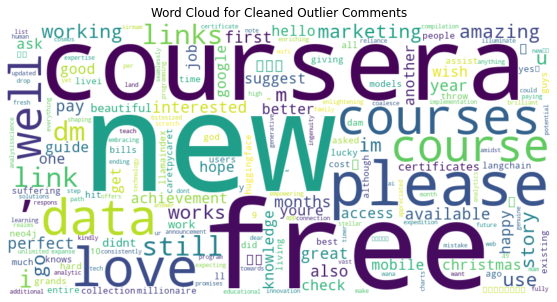

In [26]:
import string 
from collections import Counter

# Concatenate comments from outlier rows into a single text
outlier_comments_text = " ".join(outliers['comments'])

# Text cleaning
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove punctuation and convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

outlier_comments_cleaned = clean_text(outlier_comments_text)

# Tokenize the cleaned text and count word frequencies
tokenized_words = nltk.word_tokenize(outlier_comments_cleaned)
word_freq = Counter(tokenized_words)

# Create a word cloud from word frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Cleaned Outlier Comments')
plt.axis('off')
plt.show()

The analysis indicates that posts with a high engagement rate predominantly feature discussions about new free courses on Coursera. This trend suggests that users are particularly interested in accessing free educational resources on Coursera. The opportunity to gain knowledge without incurring costs appears to be a significant motivating factor for these users, inspiring them to actively participate in conversations. Their engagement, especially in the form of comments, reflects a strong **word-of-mouth** effect, as they share and discuss these opportunities within their networks. This behavior underscores the value users place on accessible education and their eagerness to spread awareness about such opportunities.

### Topic Modelling

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Tokenize the cleaned text
tokenized_comments = nltk.word_tokenize(outlier_comments_cleaned)

# Create a CountVectorizer to convert the text into a document-term matrix
vectorizer = CountVectorizer(max_df=0.85, max_features=1000, stop_words='english')
dtm = vectorizer.fit_transform(tokenized_comments)

# Create and train an LDA model
num_topics = 3  # You can adjust the number of topics as needed
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(dtm)

# Display the top words for each topic
def display_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()

n_top_words = 10  # Number of top words to display for each topic
feature_names = vectorizer.get_feature_names_out()
display_topics(lda, feature_names, n_top_words)

Topic 1:
new love links im amazing job pay christmas check wish

Topic 2:
free coursera courses data working use guide certificates good interested

Topic 3:
link dm course u200d story marketing works google beautiful available



The LDA analysis of comments from the outlier posts reveals three distinct topics, each reflecting a different aspect of user interests and conversations:

Topic 1 - Enthusiastic Endorsements: This topic is characterized by words like "new," "love," "amazing," "job," "pay," "christmas," "check," and "wish." These words suggest that users are expressing enthusiasm and positive sentiments, possibly in response to new opportunities, offerings, or achievements shared in the posts. The presence of words like "pay" and "job" might indicate discussions around employment or financial benefits, while "christmas" and "wish" hint at a festive or aspirational context.

Topic 2 - Focus on Coursera and Educational Content: Here, the dominant words are "free," "coursera," "courses," "data," "working," "use," "guide," "certificates," "good," and "interested." This topic clearly revolves around educational content, specifically free courses offered on Coursera. There's a strong focus on practical aspects like "certificates" and "guide," indicating that users are discussing the utility and application of these courses. The mention of "data" might point to a specific interest in data-related courses.

Topic 3 - Resource Accessibility and Marketing: This topic includes words like "link," "dm" (direct message), "course," "‍story," "marketing," "works," "google," "beautiful," "available." It appears to center around the sharing of resources and information, with "link" and "dm" suggesting a direct call to action for accessing courses or content. "Marketing" and "google" could indicate discussions around digital marketing courses or strategies, while "beautiful" and "available" imply positive reception and availability of these resources.

In [28]:
# import pyLDAvis
# import pyLDAvis.lda_model
 
# pyLDAvis.enable_notebook()
# panel = pyLDAvis.lda_model.prepare(lda, dtm, vectorizer, mds='tsne', n_jobs=1)
# panel

## Engagement Rate Forecasting

Next in our analysis, we will identify the social media platform with the highest engagement rate based on our earlier findings. Once this platform is selected, we'll proceed with two distinct approaches to forecast future engagement rates:

1. **Forecasting with Facebook's Prophet Model**: We'll utilize Facebook's Prophet, a robust and user-friendly forecasting tool that handles seasonal variations and trends effectively. Prophet is particularly well-suited for datasets with strong seasonal patterns and several seasons of historical data. We'll apply this model to the chosen platform's data to predict future engagement rates, taking advantage of its capabilities in handling daily, weekly, and yearly seasonality.

2. **Time Series Forecasting with ARIMA in R**: In parallel, we'll use the ARIMA (AutoRegressive Integrated Moving Average) model in R, a popular approach for time series forecasting. ARIMA is well-regarded for its flexibility in modeling a wide range of time series data. We'll apply ARIMA to the same dataset to compare its performance against Prophet's forecasts. This approach will allow us to examine the engagement rate trends through a different statistical lens, providing a comprehensive view of potential future behaviors.

By employing these two models, we aim to gain a nuanced understanding of the engagement trends on the most engaging platform, leveraging the strengths of both Prophet and ARIMA to make informed predictions about future engagement patterns.

In [29]:
merged_df['post date'] = pd.to_datetime(merged_df['post date'], format='%b %d, %Y')
engag_rate = merged_df[['post date', 'engagement rate']].sort_values(by='post date')
engag_rate.reset_index(inplace=True, drop=False)
engag_rate

,index,post date,engagement rate
0,152,2023-08-02,0.000138
1,98,2023-08-04,0.000264
2,182,2023-08-04,0.000200
3,95,2023-08-07,0.000192
4,162,2023-08-09,0.000177
...,...,...,...
327,212,2024-01-12,0.000281
328,195,2024-01-13,0.000363
329,354,2024-01-13,0.000068
330,224,2024-01-14,0.000319


In [30]:
# Group data by day and calculate the daily average
daily_average = engag_rate.groupby(engag_rate['post date'].dt.date)['engagement rate'].mean().reset_index()

# Rename columns for clarity (optional)
daily_average.columns = ['Date', 'Daily_Average']

In [31]:
daily_average['Date'] = pd.to_datetime(daily_average['Date'])

In [32]:
daily_average

,Date,Daily_Average
0,2023-08-02,0.000138
1,2023-08-04,0.000232
2,2023-08-07,0.000192
3,2023-08-09,0.000177
4,2023-08-10,0.000108
...,...,...
123,2024-01-11,0.000837
124,2024-01-12,0.000258
125,2024-01-13,0.000216
126,2024-01-14,0.000319


In [33]:
daily_average.to_csv('datacamp_engagement.csv', index=False)

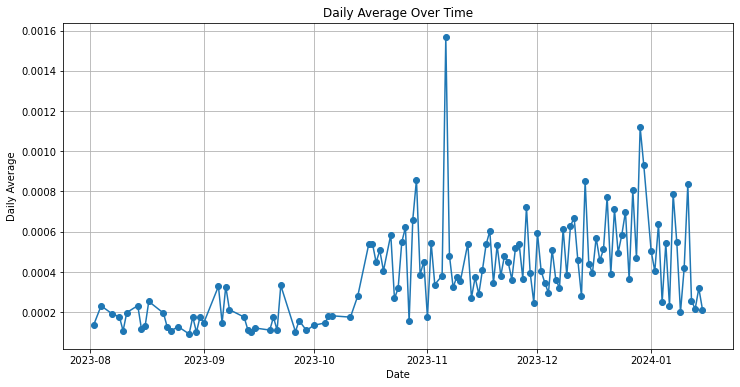

In [34]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(daily_average['Date'], daily_average['Daily_Average'], marker='o')
plt.title('Daily Average Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Average')
plt.grid(True)
plt.show()

12:46:31 - cmdstanpy - INFO - Chain [1] start processing
12:46:31 - cmdstanpy - INFO - Chain [1] done processing


            ds      yhat  yhat_lower  yhat_upper
223 2024-04-20  0.000830    0.000592    0.001053
224 2024-04-21  0.000901    0.000678    0.001147
225 2024-04-22  0.000891    0.000665    0.001153
226 2024-04-23  0.000814    0.000597    0.001050
227 2024-04-24  0.000808    0.000568    0.001065


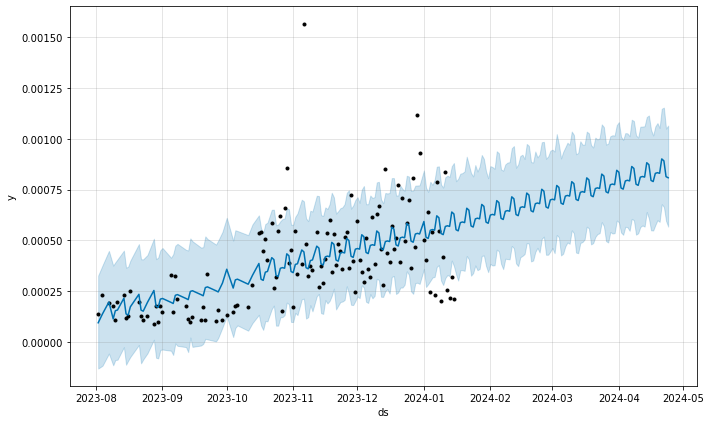

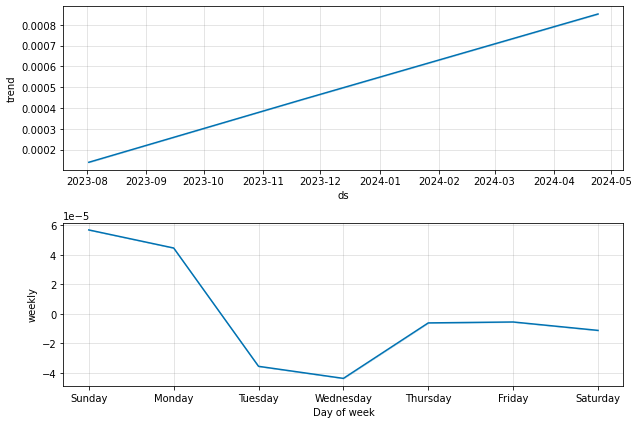

In [35]:
from prophet import Prophet

# Prophet requires the columns to be named 'ds' for Date and 'y' for the metric
daily_average.rename(columns={'Date': 'ds', 'Daily_Average': 'y'}, inplace=True)

# Initialize the Prophet model
model = Prophet()

# Fit the model with your dataframe
model.fit(daily_average)

# Create a DataFrame for future dates; for example, for 365 days in the future
future = model.make_future_dataframe(periods=100)

# Perform the forecasting
forecast = model.predict(future)

# forecast DataFrame contains a lot of information, including the forecasted values (yhat) and uncertainty intervals
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Optional: plot the forecast
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)

## Build Customer Profiles

In this section, our goal is to segment users who engage with posts about online educational platforms on Instagram. This segmentation will help us understand the types of users who interact with these posts. To achieve this, we will undertake the following steps to create a unique profile for each user:

1. **Feature Engineering from Existing Data**: We will begin by enhancing our dataset through feature engineering. This involves creating new features from the existing data, which might include metrics like frequency of interaction (likes, comments), time of engagement, and type of content interacted with. These features will help in understanding user behavior patterns and preferences.

2. **Textual Data Analysis**: Since a significant portion of user interaction is in the form of comments, we will also analyze textual data. This involves extracting features from the text of comments, such as sentiment analysis, keyword frequency, and thematic categorization. These text-derived features can provide insights into what users are discussing, their sentiments towards the content, and the specific aspects of educational content that resonate with them.

3. **User Profiling and Segmentation**: With these newly created features, we will construct comprehensive user profiles. These profiles will reflect both the quantitative aspects (like engagement frequency) and qualitative aspects (like sentiment or topics of interest) of user interactions.

4. **Analysis and Interpretation**: Finally, we will use these profiles to segment the users. This segmentation might be based on engagement levels, content preferences, sentiment, or other relevant criteria identified from the data. 

By doing so, we can gain a deeper understanding of the different types of users who interact with educational content on Instagram, which can inform targeted content strategies and enhance engagement for online educational platforms.

### 1- Feature Engineering

#### Build new Features from existing one and extract features from text

In [36]:
from textblob import TextBlob
import numpy as np

# Feature extraction

# Comment Length
comments_data['comment_length'] = comments_data['comments'].apply(len)

# Time Since Comment
# Assuming 'time per comment' is in a format like '3w' for 3 weeks
# Extracting the numerical part and converting it into weeks
comments_data['weeks_since_comment'] = comments_data['time per comment'].str.extract('(\d+)').astype(float)

# User Activity Level
# Counting the number of comments per user
comments_data['user_activity'] = comments_data.groupby('user per comment')['user per comment'].transform('count')

# Temporal Patterns
# Extracting day of the week and hour of the day from 'comment date'
comments_data['day_of_week'] = pd.to_datetime(comments_data['comment date']).dt.dayofweek  # Monday=0, Sunday=6

# Displaying the updated DataFrame with the new features
comments_data.head()

,comments,time per comment,user per comment,likes per comment,source,comment date,comments_with_meanings,sentiment_score,comment_length,weeks_since_comment,user_activity,day_of_week
0,"Hi, I am trying to make the annual subscriptio...",3w,sammie_njau,0,datacamp,2024-01-01,"Hi, I am trying to make the annual subscriptio...",-0.25,77,3.0,1,0
1,Great work ❤️❤️❤️❤️❤️,7w,credslife_,1,datacamp,2023-12-04,Great work red_heart red_heart red_heart red_h...,0.80,21,7.0,15,0
2,❤️❤️❤️,7w,sadie.stlawrence,1,datacamp,2023-12-04,red_heart red_heart red_heart,0.00,6,7.0,1,0
3,Awesome 👏🏻,5w,mahmoud_arafa90,0,datacamp,2023-12-18,Awesome clapping_hands_light_skin_tone,1.00,10,5.0,3,0
4,Great to be on the show,6w,margahoek,0,datacamp,2023-12-11,Great to be on the show,0.80,23,6.0,1,0


In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import re

# Cleaning text
def clean_text(text):
    # Remove URLs, special characters, and numbers
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)  # Remove special chars and numbers
    text = text.lower()  # Convert to lowercase
    return text

comments_data['cleaned_comments'] = comments_data['comments'].apply(clean_text)

# Extracting features for LDA
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(comments_data['cleaned_comments'])

# LDA Model
n_topics = 5  # Number of topics
lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
lda.fit(dtm)

# Assigning the dominant topic to each user
topic_results = lda.transform(dtm)
comments_data['dominant_topic'] = topic_results.argmax(axis=1)

# Displaying the updated DataFrame with the dominant topic for each user
comments_data.head()

,comments,time per comment,user per comment,likes per comment,source,comment date,comments_with_meanings,sentiment_score,comment_length,weeks_since_comment,user_activity,day_of_week,cleaned_comments,dominant_topic
0,"Hi, I am trying to make the annual subscriptio...",3w,sammie_njau,0,datacamp,2024-01-01,"Hi, I am trying to make the annual subscriptio...",-0.25,77,3.0,1,0,hi i am trying to make the annual subscription...,0
1,Great work ❤️❤️❤️❤️❤️,7w,credslife_,1,datacamp,2023-12-04,Great work red_heart red_heart red_heart red_h...,0.80,21,7.0,15,0,great work,1
2,❤️❤️❤️,7w,sadie.stlawrence,1,datacamp,2023-12-04,red_heart red_heart red_heart,0.00,6,7.0,1,0,,0
3,Awesome 👏🏻,5w,mahmoud_arafa90,0,datacamp,2023-12-18,Awesome clapping_hands_light_skin_tone,1.00,10,5.0,3,0,awesome,0
4,Great to be on the show,6w,margahoek,0,datacamp,2023-12-11,Great to be on the show,0.80,23,6.0,1,0,great to be on the show,1


In [38]:
import emoji

# Function to count emojis in a comment
def count_emojis(text):
    return len([char for char in text if char in emoji.UNICODE_EMOJI_ENGLISH])

# Function to count question marks and exclamation points
def count_punctuation(text, punctuation):
    return text.count(punctuation)


# Adding the new columns
comments_data['emoji_count'] = comments_data['comments'].apply(count_emojis)
comments_data['question_mark_count'] = comments_data['comments'].apply(lambda x: count_punctuation(x, '?'))
comments_data['exclamation_point_count'] = comments_data['comments'].apply(lambda x: count_punctuation(x, '!'))

# Display the updated DataFrame
comments_data.head()

,comments,time per comment,user per comment,likes per comment,source,comment date,comments_with_meanings,sentiment_score,comment_length,weeks_since_comment,user_activity,day_of_week,cleaned_comments,dominant_topic,emoji_count,question_mark_count,exclamation_point_count
0,"Hi, I am trying to make the annual subscriptio...",3w,sammie_njau,0,datacamp,2024-01-01,"Hi, I am trying to make the annual subscriptio...",-0.25,77,3.0,1,0,hi i am trying to make the annual subscription...,0,0,0,0
1,Great work ❤️❤️❤️❤️❤️,7w,credslife_,1,datacamp,2023-12-04,Great work red_heart red_heart red_heart red_h...,0.80,21,7.0,15,0,great work,1,5,0,0
2,❤️❤️❤️,7w,sadie.stlawrence,1,datacamp,2023-12-04,red_heart red_heart red_heart,0.00,6,7.0,1,0,,0,3,0,0
3,Awesome 👏🏻,5w,mahmoud_arafa90,0,datacamp,2023-12-18,Awesome clapping_hands_light_skin_tone,1.00,10,5.0,3,0,awesome,0,2,0,0
4,Great to be on the show,6w,margahoek,0,datacamp,2023-12-11,Great to be on the show,0.80,23,6.0,1,0,great to be on the show,1,0,0,0


In [39]:
pre_user_df = comments_data[['user per comment', 'likes per comment', 'source', 'sentiment_score', 'comment_length', 'weeks_since_comment',
                             'user_activity', 'day_of_week', 'dominant_topic', 'emoji_count', 'question_mark_count',
                            'exclamation_point_count']]

In [40]:
pre_user_df = pd.get_dummies(pre_user_df, columns=['source'])
pre_user_df

,user per comment,likes per comment,sentiment_score,comment_length,weeks_since_comment,user_activity,day_of_week,dominant_topic,emoji_count,question_mark_count,exclamation_point_count,source_coursera,source_datacamp,source_skillshare,source_udemy
0,sammie_njau,0,-0.250000,77,3.0,1,0,0,0,0,0,False,True,False,False
1,credslife_,1,0.800000,21,7.0,15,0,1,5,0,0,False,True,False,False
2,sadie.stlawrence,1,0.000000,6,7.0,1,0,0,3,0,0,False,True,False,False
3,mahmoud_arafa90,0,1.000000,10,5.0,3,0,0,2,0,0,False,True,False,False
4,margahoek,0,0.800000,23,6.0,1,0,1,0,0,0,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1806,judgingamy,1,0.282813,31,8.0,1,0,1,0,0,1,False,False,True,False
1807,safiinmotherland,1,1.000000,39,8.0,1,0,2,1,0,0,False,False,True,False
1808,theclassymamabear,0,0.781250,39,8.0,1,0,3,1,0,3,False,False,True,False
1809,dansand0val,0,0.781250,20,8.0,1,0,3,4,0,2,False,False,True,False


In [41]:
pre_user_df.columns

Index(['user per comment', 'likes per comment', 'sentiment_score',
       'comment_length', 'weeks_since_comment', 'user_activity', 'day_of_week',
       'dominant_topic', 'emoji_count', 'question_mark_count',
       'exclamation_point_count', 'source_coursera', 'source_datacamp',
       'source_skillshare', 'source_udemy'],
      dtype='object')

## User Segmentation

In [42]:
# Group by 'user per comment'
grouped = pre_user_df.groupby('user per comment')

# Calculate the average for numerical columns and other specified aggregations
aggregations = {
    'likes per comment': 'mean',
    'sentiment_score': 'mean',
    'comment_length': 'mean',
    'weeks_since_comment': 'min',
    'user_activity': 'mean',
    'emoji_count': 'mean',
    'question_mark_count': 'mean',
    'exclamation_point_count': 'mean',
    'source_coursera': lambda x: x.value_counts().index[0],
    'source_datacamp': lambda x: x.value_counts().index[0],
    'source_skillshare': lambda x: x.value_counts().index[0],
    'source_udemy': lambda x: x.value_counts().index[0],
    'dominant_topic': lambda x: x.value_counts().index[0],  # Get the most common topic
    'day_of_week': lambda x: x.value_counts().index[0],  # Get the most common day of the week
}

users_df = grouped.agg(aggregations).reset_index()

# Display the result DataFrame
users_df

,user per comment,likes per comment,sentiment_score,comment_length,weeks_since_comment,user_activity,emoji_count,question_mark_count,exclamation_point_count,source_coursera,source_datacamp,source_skillshare,source_udemy,dominant_topic,day_of_week
0,012345eva,1.0,0.0,2.0,4.0,1.0,0.0,0.0,0.0,True,False,False,False,1,0
1,0sama0fficial,2.0,0.0,18.0,2.0,1.0,0.0,0.0,0.0,True,False,False,False,0,0
2,1hugaday,0.0,0.0,9.0,4.0,1.0,1.0,0.0,1.0,False,False,True,False,4,0
3,2079harrisx,0.0,0.0,1.0,8.0,1.0,1.0,0.0,0.0,False,False,False,True,0,0
4,3xtt.05,1.0,0.0,3.0,10.0,1.0,0.0,0.0,0.0,True,False,False,False,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,zeidabadi.art,0.0,0.0,16.0,7.0,1.0,0.0,0.0,0.0,False,False,True,False,2,0
1436,zhra.al1995,3.0,0.0,11.0,23.0,1.0,1.0,0.0,0.0,False,False,False,True,0,0
1437,zikoabc123,2.0,0.5,5.0,4.0,1.0,0.0,0.0,0.0,True,False,False,False,0,0
1438,ziran_daruwala97,1.0,0.0,38.0,18.0,1.0,1.0,0.0,0.0,False,False,False,True,1,0


In [43]:
result_df = users_df.drop(['user per comment'], axis=1)

In [44]:
result_df.isna().sum()

likes per comment          0
sentiment_score            0
comment_length             0
weeks_since_comment        0
user_activity              0
emoji_count                0
question_mark_count        0
exclamation_point_count    0
source_coursera            0
source_datacamp            0
source_skillshare          0
source_udemy               0
dominant_topic             0
day_of_week                0
dtype: int64

In [45]:
result_df.columns

Index(['likes per comment', 'sentiment_score', 'comment_length',
       'weeks_since_comment', 'user_activity', 'emoji_count',
       'question_mark_count', 'exclamation_point_count', 'source_coursera',
       'source_datacamp', 'source_skillshare', 'source_udemy',
       'dominant_topic', 'day_of_week'],
      dtype='object')

In [46]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

# # Step 1: Scale the data using StandardScaler
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(result_df)

# # Create a DataFrame with the scaled data and column names
# scaled_df = pd.DataFrame(scaled_data, columns=result_df.columns)

# Step 2: Identify and remove outliers using Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outlier_predictions = iso_forest.fit_predict(result_df)

# Filter out the outliers from the DataFrame
filtered_df = result_df[outlier_predictions == 1]

# Display the filtered DataFrame without outliers
filtered_df

,likes per comment,sentiment_score,comment_length,weeks_since_comment,user_activity,emoji_count,question_mark_count,exclamation_point_count,source_coursera,source_datacamp,source_skillshare,source_udemy,dominant_topic,day_of_week
0,1.0,0.0,2.0,4.0,1.0,0.0,0.0,0.0,True,False,False,False,1,0
1,2.0,0.0,18.0,2.0,1.0,0.0,0.0,0.0,True,False,False,False,0,0
2,0.0,0.0,9.0,4.0,1.0,1.0,0.0,1.0,False,False,True,False,4,0
3,0.0,0.0,1.0,8.0,1.0,1.0,0.0,0.0,False,False,False,True,0,0
4,1.0,0.0,3.0,10.0,1.0,0.0,0.0,0.0,True,False,False,False,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,0.0,0.0,16.0,7.0,1.0,0.0,0.0,0.0,False,False,True,False,2,0
1436,3.0,0.0,11.0,23.0,1.0,1.0,0.0,0.0,False,False,False,True,0,0
1437,2.0,0.5,5.0,4.0,1.0,0.0,0.0,0.0,True,False,False,False,0,0
1438,1.0,0.0,38.0,18.0,1.0,1.0,0.0,0.0,False,False,False,True,1,0


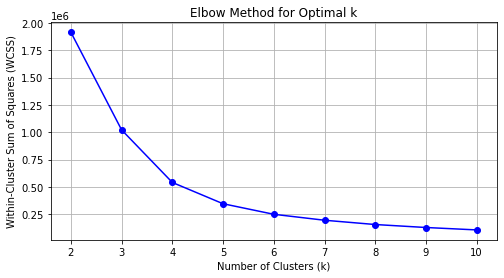

In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 2: Initialize variables for storing WCSS and silhouette scores
wcss = []
silhouette_scores = []
max_clusters = 10  # You can adjust this based on your problem

# Step 3: Calculate WCSS for different values of k
for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(filtered_df)
    wcss.append(kmeans.inertia_)

# Create an elbow plot to find the best number of clusters
plt.figure(figsize=(8, 4))
plt.plot(range(2, max_clusters + 1), wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

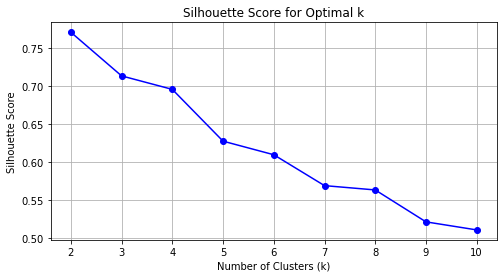

In [48]:
# Step 4: Calculate silhouette scores for different values of k
for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(filtered_df)
    silhouette_avg = silhouette_score(filtered_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Create a silhouette score plot to find the best number of clusters
plt.figure(figsize=(8, 4))
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.grid(True)
plt.show()

In [49]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Define the number of clusters
k = 4

# Create a pipeline with StandardScaler and KMeans
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: StandardScaler
    ('kmeans', KMeans(n_clusters=k, random_state=42))  # Step 2: KMeans
])

# Fit the pipeline to the data
pipeline.fit(filtered_df)

# Get cluster labels for the data
cluster_labels = pipeline.predict(filtered_df)

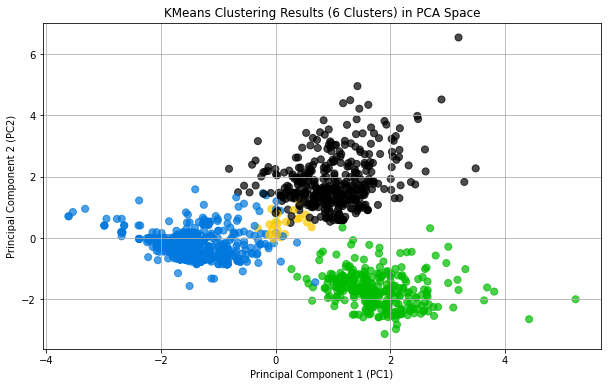

In [50]:
# Step 1: Define the number of components and clusters
n_components = 2  # Number of principal components
k = 4  # Number of clusters

# Step 2: Apply StandardScaler to preprocess the data
scaler = StandardScaler()
filtered_df_scaled = scaler.fit_transform(filtered_df)

# Step 3: Apply PCA for dimensionality reduction
pca = PCA(n_components=n_components)  # Reduce to 2 principal components for visualization
pca_result = pca.fit_transform(filtered_df_scaled)

# Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i}' for i in range(1, n_components + 1)])
pca_df['Cluster'] = cluster_labels

# Step 4: Visualize the clusters in the simplified PCA space
plt.figure(figsize=(10, 6))
colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / k)
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=colors, alpha=0.7, s=50)
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('KMeans Clustering Results (6 Clusters) in PCA Space')
plt.grid(True)
plt.show()

In [51]:
# Step 3: Add cluster labels to filtered_df
filtered_df['Cluster'] = cluster_labels

In [52]:
aggregations = {
    'likes per comment': 'mean',
    'sentiment_score': 'mean',
    'comment_length': 'mean',
    'weeks_since_comment': 'mean',
    'user_activity': 'mean',
    'emoji_count': 'mean',
    'question_mark_count': 'mean',
    'exclamation_point_count': 'mean',
    'source_coursera': lambda x: x.value_counts().index[0],
    'source_datacamp': lambda x: x.value_counts().index[0],
    'source_skillshare': lambda x: x.value_counts().index[0],
    'source_udemy': lambda x: x.value_counts().index[0],
    'dominant_topic': lambda x: x.value_counts().index[0],  # Get the most common topic
    'day_of_week': lambda x: x.value_counts().index[0],  # Get the most common day of the week
}

# Step 1: Group the data by 'Cluster' column
clustered_groups = filtered_df.groupby('Cluster')

# Step 2: Calculate aggregations for each cluster
cluster_explanations = clustered_groups.agg(aggregations)

# Step 3: Create a new DataFrame to store cluster explanations
cluster_explanations_df = pd.DataFrame(cluster_explanations)

# Rename the index to 'Cluster' for clarity
cluster_explanations_df.index.name = 'Cluster'

# Display the cluster explanations DataFrame
cluster_explanations_df

,likes per comment,sentiment_score,comment_length,weeks_since_comment,user_activity,emoji_count,question_mark_count,exclamation_point_count,source_coursera,source_datacamp,source_skillshare,source_udemy,dominant_topic,day_of_week
Cluster,,,,,,,,,,,,,,
0,0.857523,0.240913,35.577096,6.672872,1.093085,1.291762,0.143617,0.487335,False,False,True,False,0,0
1,0.97607,0.069832,18.122256,6.229358,1.181957,0.207441,0.055301,0.042431,True,False,False,False,0,0
2,0.726349,0.088661,46.554127,14.488889,1.234921,0.765926,0.106878,0.099312,False,False,False,True,0,0
3,0.434783,0.135870,33.521739,4.869565,1.043478,0.804348,0.086957,0.043478,False,True,False,False,0,0


In [53]:
cluster_explanations_df.to_csv('cluster_explanations_data.csv', index=False)

## Network Analysis

In the final section of our analysis, we will conduct a network analysis focusing on hashtag co-occurrence within the context of our dataset. A hashtag co-occurrence network is a graphical representation of how different hashtags appear together in posts or comments. In this network, each node represents a hashtag, and the connections (edges) between them indicate that they have been used together in the same posts or comments.

### What This Analysis Helps Us Achieve:

1. **Understanding Community Interests and Trends**: By examining which hashtags frequently appear together, we can identify clusters of interests or topics that are popular within the community. This helps in understanding the trending subjects or themes that are resonating with the audience.

2. **Identifying Influential Hashtags**: The network analysis can reveal which hashtags are most central or influential in the network. These are the hashtags that appear most frequently and in conjunction with a variety of others, suggesting their importance in driving engagement and conversation.

3. **Mapping Content Relationships**: The co-occurrence network helps in visualizing the relationship between different content topics. It can uncover unexpected connections between seemingly disparate subjects, offering insights into how diverse content areas may be interrelated in the minds of the audience.

4. **Informing Content Strategy**: By understanding how different hashtags and topics are interconnected, content creators and marketers can design more effective content strategies. They can leverage popular and influential hashtags to increase the reach and engagement of their posts.

5. **Segmenting Audiences Based on Interests**: The network can also assist in segmenting the audience based on their interests. By identifying clusters of hashtags, we can infer the interest groups within our audience and tailor content specifically for these segments.

Overall, the hashtag co-occurrence network analysis provides a rich, data-driven way to explore and understand the dynamics of audience engagement and content interaction on social media platforms.

### Hashtag Co-Occurence Network

In [54]:
# Checking for the presence of hashtags in the 'post caption' field
has_hashtags = merged_df['post caption'].str.contains('#').any()
has_hashtags_summary = "Hashtags present in 'post caption' field." if has_hashtags else "No hashtags found in 'post caption' field."

has_hashtags_summary

"Hashtags present in 'post caption' field."

In [55]:
import networkx as nx
import re
from itertools import combinations

# Function to extract hashtags from a string
def extract_hashtags(s):
    return re.findall(r"#(\w+)", s)

# Create an empty graph
G = nx.Graph()

# Loop through each post caption and add edges between every pair of hashtags
for caption in merged_df['post caption'].dropna():
    hashtags = extract_hashtags(caption)
    # For each combination of hashtags, add an edge to the graph
    for hashtag_pair in combinations(hashtags, 2):
        if hashtag_pair[0] != hashtag_pair[1]:
            G.add_edge(hashtag_pair[0], hashtag_pair[1])

# Basic information about the graph
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

num_nodes, num_edges

(308, 1079)

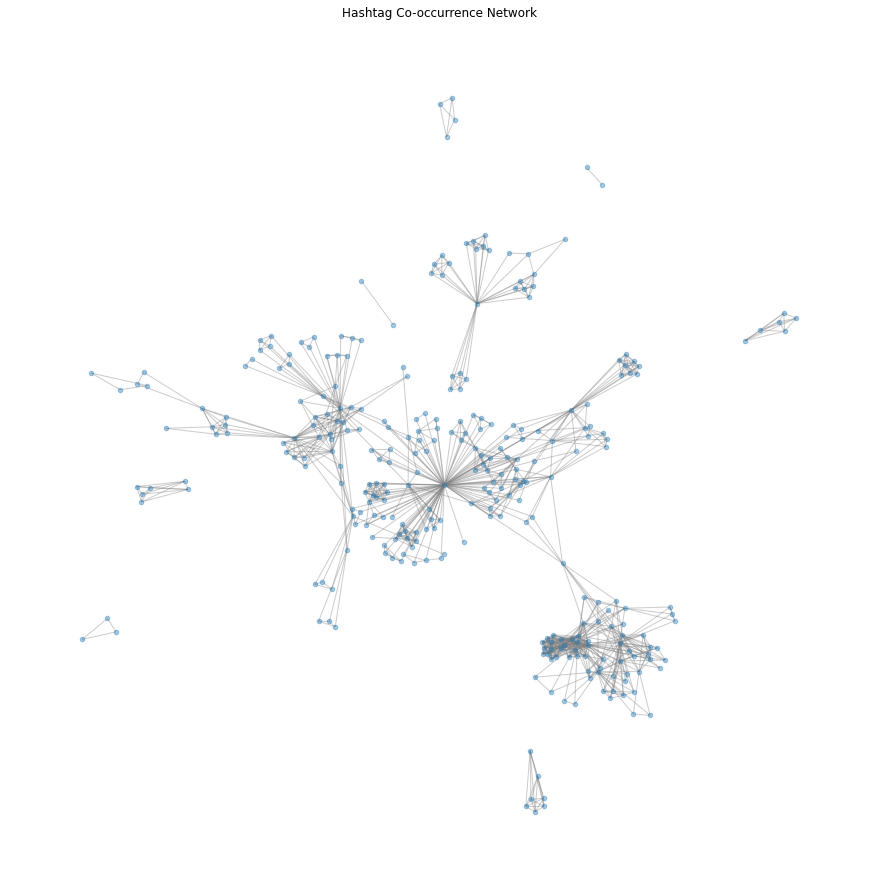

In [56]:
import matplotlib.pyplot as plt

# Setting the figure size for the network visualization
plt.figure(figsize=(12, 12))

# Drawing the network graph
# Using a layout that helps in visualizing large networks
pos = nx.spring_layout(G, k=0.05, iterations=20)
nx.draw(G, pos, with_labels=False, node_size=20, edge_color="grey", alpha=0.4)

# Display the network graph
plt.title("Hashtag Co-occurrence Network")
plt.show()

In [57]:
# Calculating Degree Centrality
degree_centrality = nx.degree_centrality(G)

# Sorting the nodes (hashtags) by their degree centrality
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

# Displaying the top 10 nodes
top_10_hashtags_by_centrality = sorted_degree_centrality[:10]
print(top_10_hashtags_by_centrality)

[('skillshare', 0.3387622149837134), ('coursera', 0.13355048859934854), ('careerchange', 0.10749185667752444), ('datascience', 0.10423452768729642), ('dataanalytics', 0.08794788273615635), ('ChatGPT', 0.08143322475570033), ('OnlineLearning', 0.08143322475570033), ('tech', 0.07817589576547232), ('Skillshare', 0.07817589576547232), ('onlinelearning', 0.07166123778501629)]


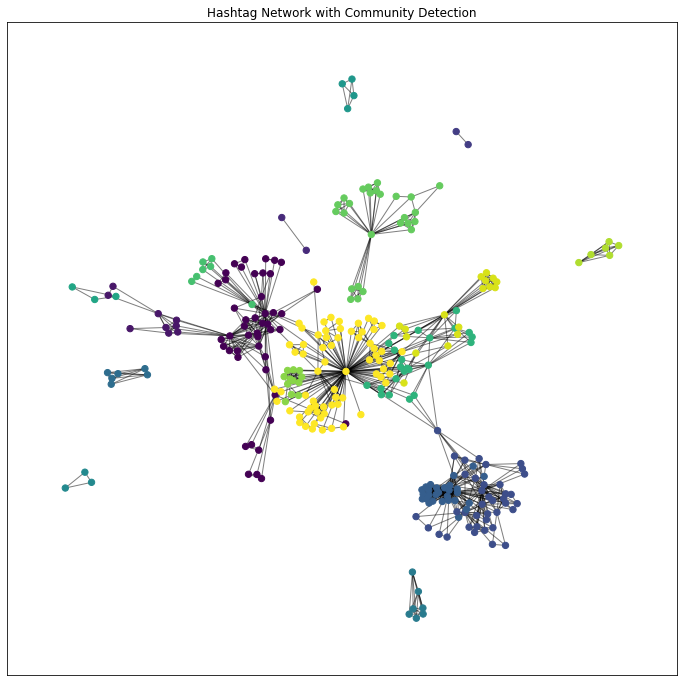

In [58]:
import community as community_louvain

# Use the Louvain method for community detection
partition = community_louvain.best_partition(G)

# Adding community information to the nodes
for node in G.nodes():
    G.nodes[node]['community'] = partition[node]

# Visualize the network with community colors
plt.figure(figsize=(12, 12))
cmap = plt.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title("Hashtag Network with Community Detection")
plt.show()

In [59]:
import matplotlib.pyplot as plt
import networkx as nx
import community as community_louvain

# Assuming 'G' is your network graph and 'partition' is the result of community detection

# Function to get the top nodes in a community by degree centrality
def top_nodes_in_community(graph, community_id, partition, top_n=5):
    nodes_in_community = [node for node, comm_id in partition.items() if comm_id == community_id]
    subgraph = graph.subgraph(nodes_in_community)
    centrality = nx.degree_centrality(subgraph)
    sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
    return sorted_centrality[:top_n]

# Analyze each community
community_analysis = {}
for comm_id in set(partition.values()):
    community_analysis[comm_id] = {
        'size': len([node for node in partition if partition[node] == comm_id]),
        'top_nodes': top_nodes_in_community(G, comm_id, partition, 5)
    }

# Display the analysis for each community
for comm_id, info in community_analysis.items():
    print(f"Community {comm_id}: Size = {info['size']}, Top Nodes = {info['top_nodes']}")
    print()

Community 0: Size = 46, Top Nodes = [('OnlineLearning', 0.5555555555555556), ('ChatGPT', 0.4222222222222222), ('AI', 0.4222222222222222), ('GenerativeAI', 0.37777777777777777), ('GenAI', 0.24444444444444446)]

Community 1: Size = 9, Top Nodes = [('Python', 0.875), ('1', 0.75), ('PowerBI', 0.75), ('CyberMonday', 0.625), ('R', 0.625)]

Community 2: Size = 2, Top Nodes = [('DCClassrooms', 1.0), ('DCDonates', 1.0)]

Community 3: Size = 2, Top Nodes = [('AlwaysLearning', 1.0), ('McLarenRacing101', 1.0)]

Community 4: Size = 39, Top Nodes = [('careerchange', 0.763157894736842), ('onlinelearning', 0.5263157894736842), ('indemandcareers', 0.39473684210526316), ('newcareer', 0.3684210526315789), ('degree', 0.23684210526315788)]

Community 5: Size = 28, Top Nodes = [('coursera', 1.0), ('dataanalytics', 1.0), ('datascience', 0.9259259259259258), ('machinelearning', 0.8148148148148148), ('data', 0.8148148148148148)]

Community 6: Size = 6, Top Nodes = [('GlobalHealth', 1.0), ('SaludPública', 1.0),

Each community is characterized by its size (number of nodes or members) and the top nodes (members) within that community, along with a relevance score indicating how strongly each node is associated with the community. Here's a general interpretation:

1. Community 0: This community has 55 members, and the top nodes in this community include topics related to AI and online learning, with "ChatGPT" and "OnlineLearning" being the most relevant nodes.

2. Community 1: This community is small, with only 2 members, and both are strongly related to "DCDonates" and "DCClassrooms."

3. Community 2: Another small community with 2 members, focused on "McLarenRacing101" and "AlwaysLearning."

4. Community 3: Comprising 3 members, this community is related to DIY crafts and activities, with nodes like "DIYcrafts" and "DIY" being highly relevant.

5. Community 4: This larger community with 35 members is associated with topics like career change, online learning, and in-demand careers.

6. Community 5: It consists of 32 members and is centered around topics like Coursera, data analytics, and programming.

7. Community 6: A community of 6 members strongly related to global health and public health topics.

8. Community 7: This community has 7 members and is focused on water stewardship and conservation, with affiliations to Arizona State University and science-based targets.

9. Community 8: A small community with 3 members, all related to cybersecurity and online safety.

10. Community 9: This is a larger community with 68 members, with a strong affiliation to Skillshare and various creative and DIY topics.

11. Community 10: Comprising 4 members, this community is centered around creativity and Hispanic/Latine heritage.

12. Community 11: It has 23 members and is associated with animation, digital art, and related topics.

13. Community 12: A community of 7 members, mostly related to photography, film, and film cameras.

14. Community 13: With 26 members, this community is strongly connected to Skillshare and topics like UX design and food photography.

15. Community 14: A community of 12 members focused on baking and related topics.

16. Community 16: This community, with 17 members, is centered around skill-sharing classes and home cooking.

These communities help organize and understand the network based on the common interests or affiliations of its members. The top nodes provide insights into the main topics or themes within each community.

# Thank You!